# Pandas + ML — Part 5
**Model comparison plots** for multiple classifiers on the cleaned Iris dataset.

**What we do:**
- Ensure cleaned dataset exists
- Fit 3 models (LogisticRegression, RandomForest, GradientBoosting)
- Compute Accuracy and Macro-F1 on the test set
- Plot comparison charts (one plot per cell, Matplotlib only)


In [2]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Paths (assume running from repo root; adjust if needed)
CLEAN_PATH = "ml_projects/data/iris_cleaned_engineered.csv"

# Ensure cleaned dataset exists (create minimal version if missing)
if not os.path.exists(CLEAN_PATH):
    iris = load_iris(as_frame=True)
    df = iris.frame.copy()
    df.rename(columns={'target': 'species_index'}, inplace=True)
    df['species'] = df['species_index'].map(dict(enumerate(iris.target_names)))
    # Basic features + scaling
    df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
    df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']
    num_cols = [c for c in df.columns if df[c].dtype != 'object' and c != 'species_index']
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    os.makedirs("ml_projects/data", exist_ok=True)
    df.to_csv(CLEAN_PATH, index=False)
    print("Created:", CLEAN_PATH)
else:
    print("Found:", CLEAN_PATH)

df = pd.read_csv(CLEAN_PATH)
X = df.drop(columns=['species','species_index'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

models = {
    "LogReg": LogisticRegression(max_iter=200),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradBoost": GradientBoostingClassifier(random_state=42),
}

metrics = []
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average='macro')
    metrics.append((name, acc, f1m))

results = pd.DataFrame(metrics, columns=["model", "accuracy", "f1_macro"]).set_index("model")
results

Created: ml_projects/data/iris_cleaned_engineered.csv


,accuracy,f1_macro
model,,
LogReg,0.911111,0.910714
RandomForest,0.911111,0.910714
GradBoost,0.888889,0.887767


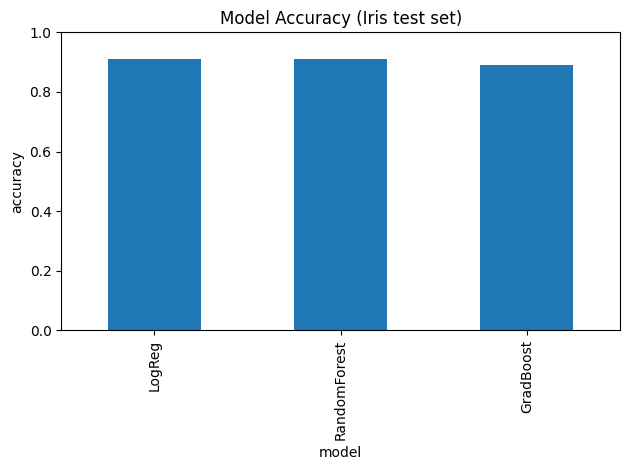

In [3]:
# Plot 1: Accuracy comparison
plt.figure()
results["accuracy"].plot(kind="bar")
plt.title("Model Accuracy (Iris test set)")
plt.ylabel("accuracy")
plt.xlabel("model")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

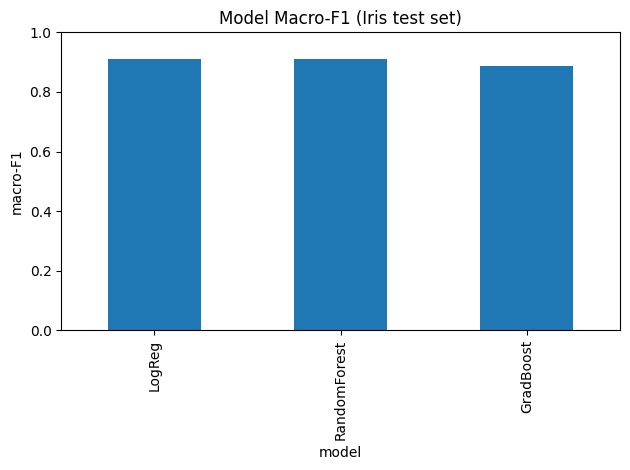

In [4]:
# Plot 2: Macro-F1 comparison
plt.figure()
results["f1_macro"].plot(kind="bar")
plt.title("Model Macro-F1 (Iris test set)")
plt.ylabel("macro-F1")
plt.xlabel("model")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Notes
- Bars use Matplotlib defaults (no custom colors/styles)
- You can re-run this after tuning models in Part 4 to compare again
- Consider exporting `results` to CSV if you want to track experiments over time